Using device: cpu
Full dataset size: 1020 images

Subset created:
  Classes: 5
  Training samples: 35
  Validation samples: 15


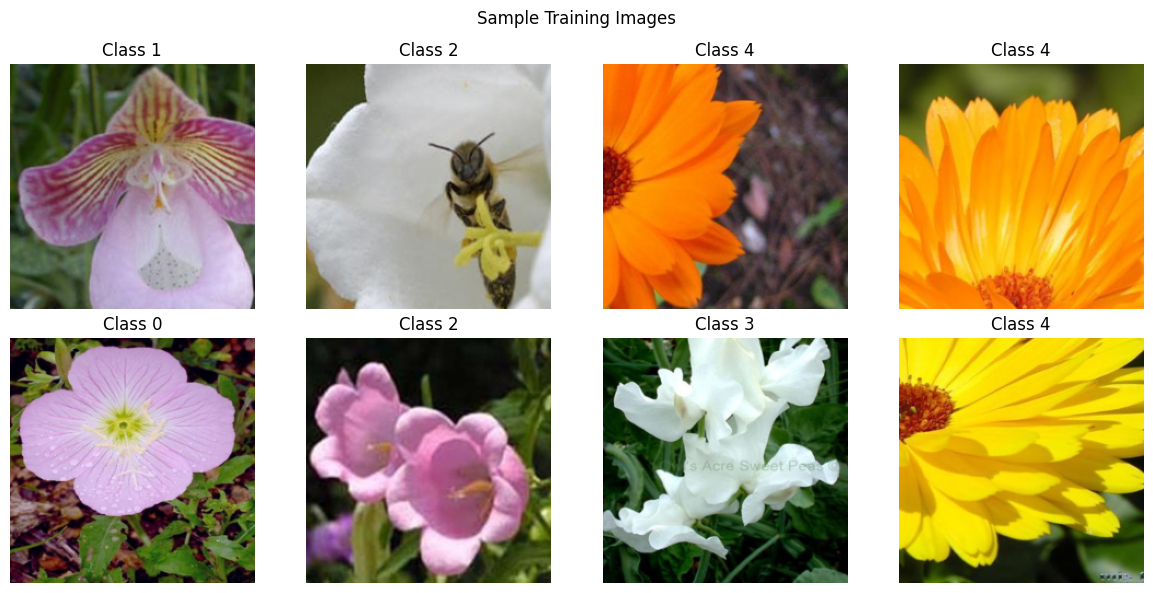

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model: ResNet18
Output classes: 5
Trainable parameters: 11,179,077
Loss function: CrossEntropyLoss
Optimizer: Adam
Learning rate: 0.001
Starting training...
------------------------------------------------------------
Epoch [  1/50] Train Loss: 1.3502, Train Acc:  45.71% | Val Loss: 1.6721, Val Acc:  53.33%
Epoch [  5/50] Train Loss: 0.6322, Train Acc:  82.86% | Val Loss: 2.7132, Val Acc:  60.00%
Epoch [ 10/50] Train Loss: 0.7954, Train Acc:  80.00% | Val Loss: 1.3253, Val Acc:  80.00%

⚠️  Overfitting detected at epoch 13!
Epoch [ 15/50] Train Loss: 1.2170, Train Acc:  57.14% | Val Loss: 1.1019, Val Acc:  46.67%
Epoch [ 20/50] Train Loss: 1.2336, Train Acc:  62.86% | Val Loss: 2.5155, Val Acc:  26.67%
Epoch [ 25/50] Train Loss: 1.0434, Train Acc:  77.14% | Val Loss: 6.3715, Val Acc:  26.67%
Epoch [ 30/50] Train Loss: 0.6113, Train Acc:  85.71% | Val Loss: 1.6772, Val Acc:  53.33%
Epoch [ 35/50] Train Loss: 0.8544, Train Acc:  80.00% | Val Loss: 1.4968, Val Acc:  60.00%
Epoch [ 40/50] 

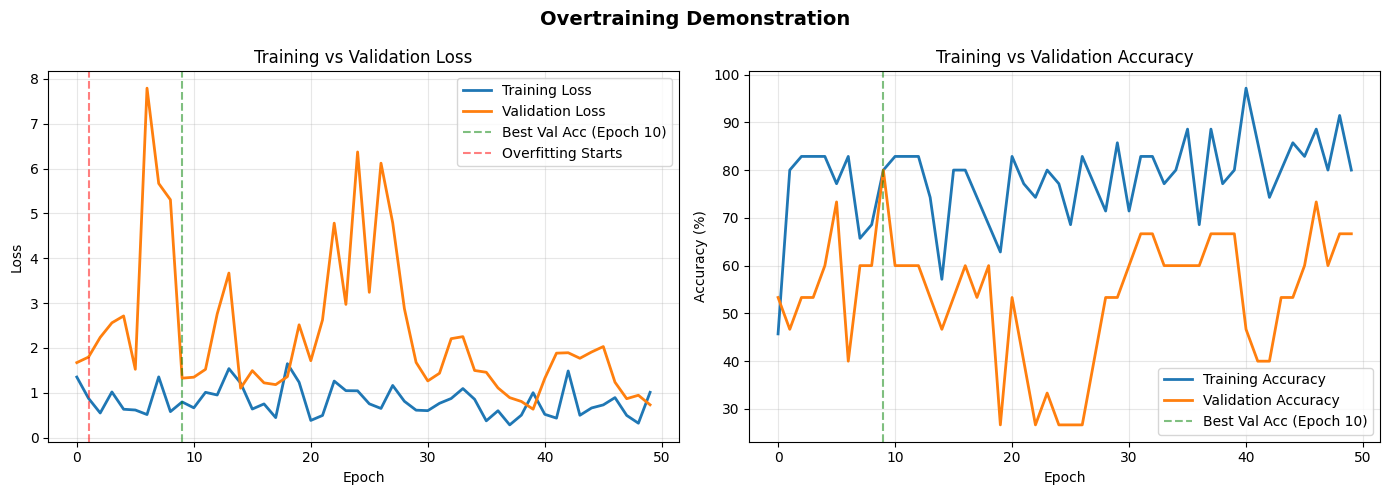


📊 Key Training Milestones:
------------------------------------------------------------

Early Training (Epochs 1-5):
 Epoch  Train Acc   Val Acc  Overfitting Gap
     1  45.714286 53.333333        -7.619048
     2  80.000000 46.666667        33.333333
     3  82.857143 53.333333        29.523810
     4  82.857143 53.333333        29.523810
     5  82.857143 60.000000        22.857143

Middle Training (Epochs 16-20):
 Epoch  Train Acc   Val Acc  Overfitting Gap
    16  80.000000 53.333333        26.666667
    17  80.000000 60.000000        20.000000
    18  74.285714 53.333333        20.952381
    19  68.571429 60.000000         8.571429
    20  62.857143 26.666667        36.190476

Late Training (Last 5 epochs):
 Epoch  Train Acc   Val Acc  Overfitting Gap
    46  82.857143 60.000000        22.857143
    47  88.571429 73.333333        15.238095
    48  80.000000 60.000000        20.000000
    49  91.428571 66.666667        24.761905
    50  80.000000 66.666667        13.333333


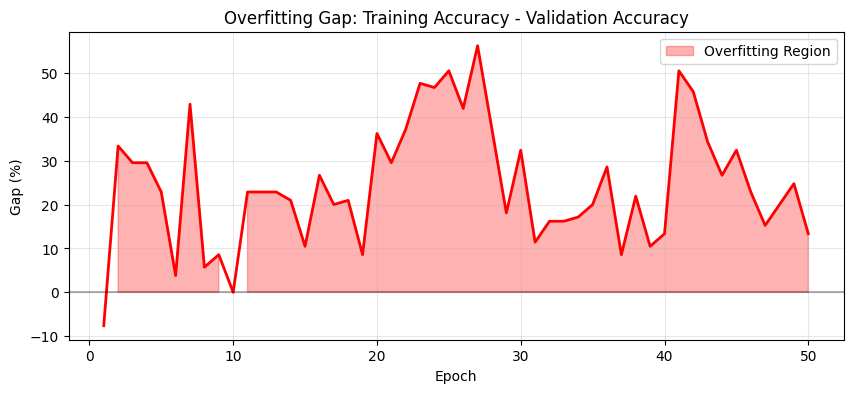

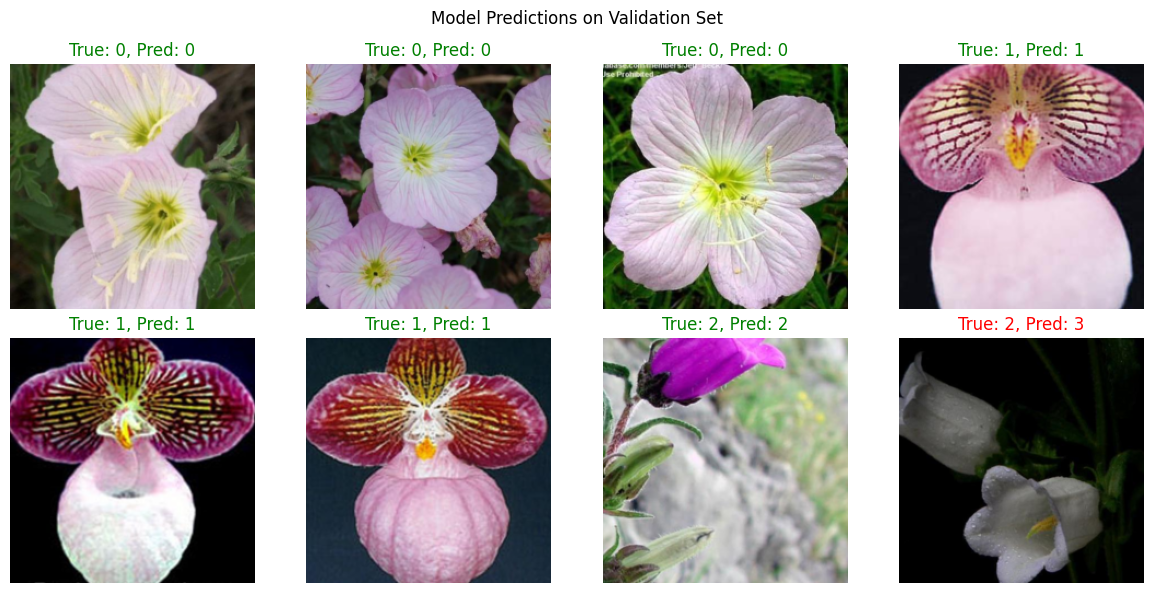


METHODS TO PREVENT OVERTRAINING

1. Early Stopping:
   Stop training at epoch 10 when validation accuracy was highest

2. Weight Decay:
   Add L2 regularization (weight_decay=1e-4) to optimizer

3. Dropout:
   Add dropout layers in the classifier to randomly disable neurons

4. Data Augmentation:
   Increase augmentation techniques (rotation, color jitter, etc.)

5. Lower Learning Rate:
   Use smaller learning rate (e.g., 1e-4) for slower convergence

6. More Data:
   Collect more training samples per class

7. Learning Rate Scheduling:
   Reduce learning rate when validation loss plateaus

📊 PER-CLASS PERFORMANCE:
----------------------------------------
Class 0: 100.0% accuracy (3/3 correct)
Class 1: 100.0% accuracy (3/3 correct)
Class 2: 33.3% accuracy (1/3 correct)
Class 3: 33.3% accuracy (1/3 correct)
Class 4: 66.7% accuracy (2/3 correct)

✅ Best performing class: Class 0 (100.0%)
❌ Worst performing class: Class 2 (33.3%)


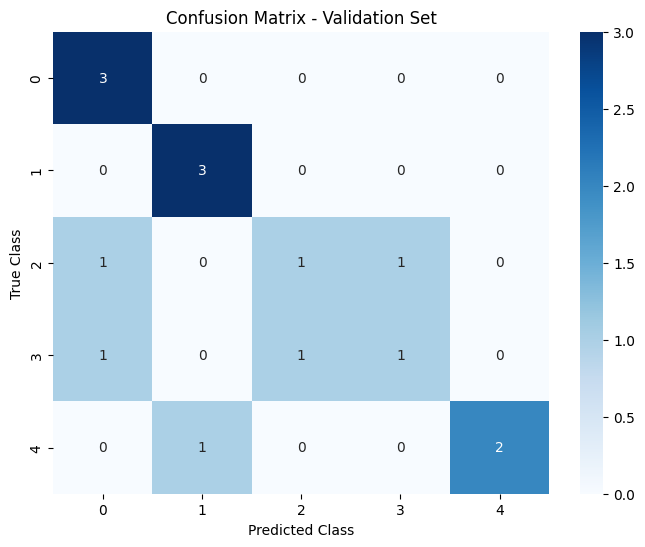


🔍 CONFUSION MATRIX ANALYSIS:
----------------------------------------
Class 2 misclassified as Class 0: 1 times
Class 2 misclassified as Class 3: 1 times
Class 3 misclassified as Class 0: 1 times
Class 3 misclassified as Class 2: 1 times
Class 4 misclassified as Class 1: 1 times

📈 DETAILED METRICS FROM CONFUSION MATRIX:
----------------------------------------
Class 0:
  Precision: 0.60
  Recall: 1.00
  F1-Score: 0.75
Class 1:
  Precision: 0.75
  Recall: 1.00
  F1-Score: 0.86
Class 2:
  Precision: 0.50
  Recall: 0.33
  F1-Score: 0.40
Class 3:
  Precision: 0.50
  Recall: 0.33
  F1-Score: 0.40
Class 4:
  Precision: 1.00
  Recall: 0.67
  F1-Score: 0.80

RECOMMENDATIONS FOR WORST PERFORMING CLASSES
1. Collect more diverse training samples for underperforming classes
2. Apply class-specific augmentation strategies
3. Use weighted loss function to handle class imbalance
4. Perform error analysis to understand misclassification patterns
5. Consider using ensemble methods or model averaging


In [ ]:
#!/usr/bin/env python
# coding: utf-8

# # Demonstrating Overtraining with Flowers102 Dataset
#
# This notebook demonstrates overtraining (overfitting) using a pretrained ResNet18 model on a small subset of the Flowers102 dataset.

# ## 1. Setup and Imports

# Install required packages if needed
# !pip install torch torchvision matplotlib pandas seaborn scikit-learn

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
import torchvision
from torchvision import transforms, models
from torchvision.datasets import Flowers102
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict
import random
import time

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ## 2. Dataset Preparation
#
# We'll use only 5 flower classes with ~30 samples each to intentionally cause overfitting

# Define data transforms
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Download and load the full dataset
print("Downloading Flowers102 dataset...")
full_dataset = Flowers102(root='./data', split='train', download=True)
print(f"Full dataset size: {len(full_dataset)} images")

# Select subset of classes and samples
n_classes = 5
samples_per_class = 30

# Group indices by class
class_indices = defaultdict(list)
for idx in range(len(full_dataset)):
    _, label = full_dataset[idx]
    if label < n_classes:  # Only use first 5 classes
        class_indices[label].append(idx)

# Create train/val split
train_indices = []
val_indices = []

for class_id in range(n_classes):
    indices = class_indices[class_id][:samples_per_class]
    random.shuffle(indices)

    # 70% train, 30% validation
    split_point = int(len(indices) * 0.7)
    train_indices.extend(indices[:split_point])
    val_indices.extend(indices[split_point:])

print(f"\nSubset created:")
print(f"  Classes: {n_classes}")
print(f"  Training samples: {len(train_indices)}")
print(f"  Validation samples: {len(val_indices)}")

# Create datasets with transforms
train_dataset_transformed = Flowers102(root='./data', split='train',
                                      transform=train_transform, download=False)
val_dataset_transformed = Flowers102(root='./data', split='train',
                                    transform=val_transform, download=False)

# Create subsets
train_subset = Subset(train_dataset_transformed, train_indices)
val_subset = Subset(val_dataset_transformed, val_indices)

# Create data loaders
train_loader = DataLoader(train_subset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=16, shuffle=False)

# Show a batch of images
def show_batch(loader):
    images, labels = next(iter(loader))

    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.ravel()

    for i in range(min(8, len(images))):
        img = images[i].cpu()
        # Denormalize
        img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        img = img + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        img = torch.clamp(img, 0, 1)

        axes[i].imshow(img.permute(1, 2, 0))
        axes[i].set_title(f'Class {labels[i].item()}')
        axes[i].axis('off')

    plt.suptitle('Sample Training Images')
    plt.tight_layout()
    plt.show()

show_batch(train_loader)

# ## 3. Model Setup
#
# Using pretrained ResNet18 and replacing the final layer

# Load pretrained ResNet18
model = models.resnet18(pretrained=True)

# Modify the final layer for our number of classes
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, n_classes)

# Move model to device
model = model.to(device)

print(f"Model: ResNet18")
print(f"Output classes: {n_classes}")
print(f"Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

# ## 4. Loss Function and Optimizer

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer - using high learning rate to accelerate overfitting
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(f"Loss function: CrossEntropyLoss")
print(f"Optimizer: Adam")
print(f"Learning rate: {learning_rate}")

# ## 5. Training Functions

def train_epoch(model, loader, criterion, optimizer):
    """Train for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, targets in loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    avg_loss = running_loss / len(loader)
    accuracy = 100. * correct / total

    return avg_loss, accuracy

def validate_epoch(model, loader, criterion):
    """Validate the model"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    avg_loss = running_loss / len(loader)
    accuracy = 100. * correct / total

    return avg_loss, accuracy

# ## 6. Training Loop - Demonstrating Overtraining

# Storage for metrics
train_losses = []
val_losses = []
train_accs = []
val_accs = []

# Train for many epochs (deliberately overtraining)
n_epochs = 50
best_val_acc = 0
best_epoch = 0
overfit_detected = False

print("Starting training...")
print("-" * 60)

for epoch in range(n_epochs):
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)

    # Validate
    val_loss, val_acc = validate_epoch(model, val_loader, criterion)

    # Store metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    # Track best validation accuracy
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = epoch

    # Detect overfitting (validation loss increasing while training loss decreasing)
    if epoch > 10 and not overfit_detected:
        if val_losses[-1] > val_losses[-2] and train_losses[-1] < train_losses[-2]:
            print(f"\n⚠️  Overfitting detected at epoch {epoch + 1}!")
            overfit_detected = True

    # Print progress
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1:3d}/{n_epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:6.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:6.2f}%")

print("-" * 60)
print(f"Training complete!")
print(f"Best validation accuracy: {best_val_acc:.2f}% at epoch {best_epoch + 1}")
print(f"Final training accuracy: {train_accs[-1]:.2f}%")
print(f"Final validation accuracy: {val_accs[-1]:.2f}%")
print(f"Overfitting gap: {train_accs[-1] - val_accs[-1]:.2f}%")

# ## 7. Visualization - Training vs Validation Curves

# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss curves
ax1.plot(train_losses, label='Training Loss', linewidth=2)
ax1.plot(val_losses, label='Validation Loss', linewidth=2)
ax1.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.5, label=f'Best Val Acc (Epoch {best_epoch+1})')
if overfit_detected:
    overfit_epoch = next(i for i, (tl, vl) in enumerate(zip(train_losses[1:], val_losses[1:]), 1)
                         if vl > val_losses[i-1] and tl < train_losses[i-1])
    ax1.axvline(x=overfit_epoch, color='red', linestyle='--', alpha=0.5, label='Overfitting Starts')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training vs Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curves
ax2.plot(train_accs, label='Training Accuracy', linewidth=2)
ax2.plot(val_accs, label='Validation Accuracy', linewidth=2)
ax2.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.5, label=f'Best Val Acc (Epoch {best_epoch+1})')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training vs Validation Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('Overtraining Demonstration', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ## 8. Overfitting Gap Analysis

# Create DataFrame for better visualization
epochs_range = range(1, n_epochs + 1)
df = pd.DataFrame({
    'Epoch': epochs_range,
    'Train Loss': train_losses,
    'Val Loss': val_losses,
    'Train Acc': train_accs,
    'Val Acc': val_accs,
    'Overfitting Gap': [t - v for t, v in zip(train_accs, val_accs)]
})

# Show key epochs
print("\n📊 Key Training Milestones:")
print("-" * 60)

# Early epochs
early_df = df.iloc[:5]
print("\nEarly Training (Epochs 1-5):")
print(early_df[['Epoch', 'Train Acc', 'Val Acc', 'Overfitting Gap']].to_string(index=False))

# Middle epochs
middle_df = df.iloc[15:20]
print("\nMiddle Training (Epochs 16-20):")
print(middle_df[['Epoch', 'Train Acc', 'Val Acc', 'Overfitting Gap']].to_string(index=False))

# Late epochs
late_df = df.iloc[-5:]
print("\nLate Training (Last 5 epochs):")
print(late_df[['Epoch', 'Train Acc', 'Val Acc', 'Overfitting Gap']].to_string(index=False))

# Plot overfitting gap
plt.figure(figsize=(10, 4))
plt.plot(df['Epoch'], df['Overfitting Gap'], linewidth=2, color='red')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.fill_between(df['Epoch'], 0, df['Overfitting Gap'], where=(df['Overfitting Gap'] > 0),
                 color='red', alpha=0.3, label='Overfitting Region')
plt.xlabel('Epoch')
plt.ylabel('Gap (%)')
plt.title('Overfitting Gap: Training Accuracy - Validation Accuracy')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# ## 9. Testing Model Predictions

# Get a batch for prediction demonstration
test_images, test_labels = next(iter(val_loader))
test_images = test_images[:8].to(device)
test_labels = test_labels[:8]

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(test_images)
    _, predicted = outputs.max(1)

# Visualize predictions
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i in range(8):
    img = test_images[i].cpu()
    # Denormalize
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    img = img + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    img = torch.clamp(img, 0, 1)

    axes[i].imshow(img.permute(1, 2, 0))
    color = 'green' if predicted[i] == test_labels[i] else 'red'
    axes[i].set_title(f'True: {test_labels[i].item()}, Pred: {predicted[i].item()}', color=color)
    axes[i].axis('off')

plt.suptitle('Model Predictions on Validation Set')
plt.tight_layout()
plt.show()

# ## 10. Methods to Prevent Overtraining

print("\n" + "="*70)
print("METHODS TO PREVENT OVERTRAINING")
print("="*70)

methods = [
    ("Early Stopping", f"Stop training at epoch {best_epoch + 1} when validation accuracy was highest"),
    ("Weight Decay", "Add L2 regularization (weight_decay=1e-4) to optimizer"),
    ("Dropout", "Add dropout layers in the classifier to randomly disable neurons"),
    ("Data Augmentation", "Increase augmentation techniques (rotation, color jitter, etc.)"),
    ("Lower Learning Rate", "Use smaller learning rate (e.g., 1e-4) for slower convergence"),
    ("More Data", "Collect more training samples per class"),
    ("Learning Rate Scheduling", "Reduce learning rate when validation loss plateaus")
]

for i, (method, description) in enumerate(methods, 1):
    print(f"\n{i}. {method}:")
    print(f"   {description}")

# ## 11. Per-Class Performance Analysis and Confusion Matrix

def analyze_class_performance():
    """Analyze which classes perform best/worst and create confusion matrix"""
    class_correct = [0] * n_classes
    class_total = [0] * n_classes

    # For confusion matrix
    all_preds = []
    all_labels = []

    model.eval()
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)

            # Store for confusion matrix
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(targets.cpu().numpy())

            for i in range(targets.size(0)):
                label = targets[i].item()
                if label < n_classes:
                    class_total[label] += 1
                    if predicted[i] == targets[i]:
                        class_correct[label] += 1

    #class accuracy
    class_accuracy = []
    for i in range(n_classes):
        if class_total[i] > 0:
            acc = 100 * class_correct[i] / class_total[i]
            class_accuracy.append(acc)
            print(f"Class {i}: ({class_correct[i]}/{class_total[i]} correct)")
        else:
            class_accuracy.append(0)

    #best and worst
    best_class = np.argmax(class_accuracy)
    worst_class = np.argmin(class_accuracy)

    print(f"\n✅ Best performing class: Class {best_class} ({class_accuracy[best_class]:.1f}%)")
    print(f"❌ Worst performing class: Class {worst_class} ({class_accuracy[worst_class]:.1f}%)")

    return class_accuracy, all_preds, all_labels

print("\n📊 PER-CLASS PERFORMANCE:")
print("-" * 40)
class_performance, predictions, true_labels = analyze_class_performance()

# Create Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(n_classes),
            yticklabels=range(n_classes))
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Analyze confusion patterns
print("\n🔍 CONFUSION MATRIX ANALYSIS:")
print("-" * 40)
for i in range(n_classes):
    for j in range(n_classes):
        if i != j and cm[i, j] > 0:
            print(f"Class {i} misclassified as Class {j}: {cm[i, j]} times")

# Calculate metrics from confusion matrix
print("\n📈 DETAILED METRICS FROM CONFUSION MATRIX:")
print("-" * 40)
for i in range(n_classes):
    # Calculate precision and recall
    true_positives = cm[i, i]
    false_positives = cm[:, i].sum() - true_positives
    false_negatives = cm[i, :].sum() - true_positives

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Class {i}:")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-Score: {f1:.2f}")

# ## 12. Recommendations for Improvement

print("\n" + "="*70)
print("RECOMMENDATIONS FOR WORST PERFORMING CLASSES")
print("="*70)

recommendations = [
    "Collect more diverse training samples for underperforming classes",
    "Apply class-specific augmentation strategies",
    "Use weighted loss function to handle class imbalance",
    "Perform error analysis to understand misclassification patterns",
    "Consider using ensemble methods or model averaging",
    "Fine-tune with focused training on hard examples"
]

for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

# ## 13. Summary and Conclusions

print("\n" + "="*70)
print("EXPERIMENT SUMMARY")
print("="*70)

summary_points = [
    f"✓ Successfully demonstrated overfitting with {n_classes} flower classes",
    f"✓ Training accuracy reached {train_accs[-1]:.1f}% while validation stayed at {val_accs[-1]:.1f}%",
    f"✓ Overfitting gap of {train_accs[-1] - val_accs[-1]:.1f}% shows clear memorization",
    f"✓ Best validation performance was {best_val_acc:.1f}% at epoch {best_epoch + 1}",
    f"✓ Continuing training beyond epoch {best_epoch + 1} only increased overfitting",
    "✓ Small dataset size (30 samples/class) contributed to overfitting",
    "✓ High model capacity (ResNet18) relative to data size accelerated overfitting"
]

for point in summary_points:
    print(f"\n{point}")

print("\n" + "="*70)
print("EXPERIMENT COMPLETE")
print("="*70)